In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
data = pd.read_csv('concrete.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [7]:
data.shape

(1030, 9)

In [8]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [9]:
data.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<AxesSubplot:>

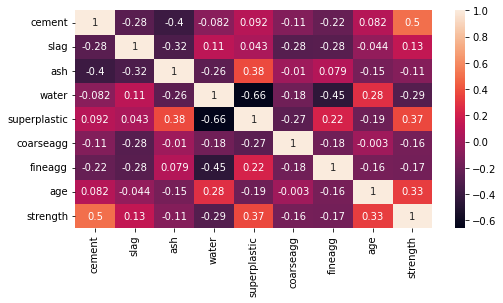

In [10]:
plt.figure(figsize=(8,4))
sns.heatmap(data.corr(), annot=True)

In [11]:
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

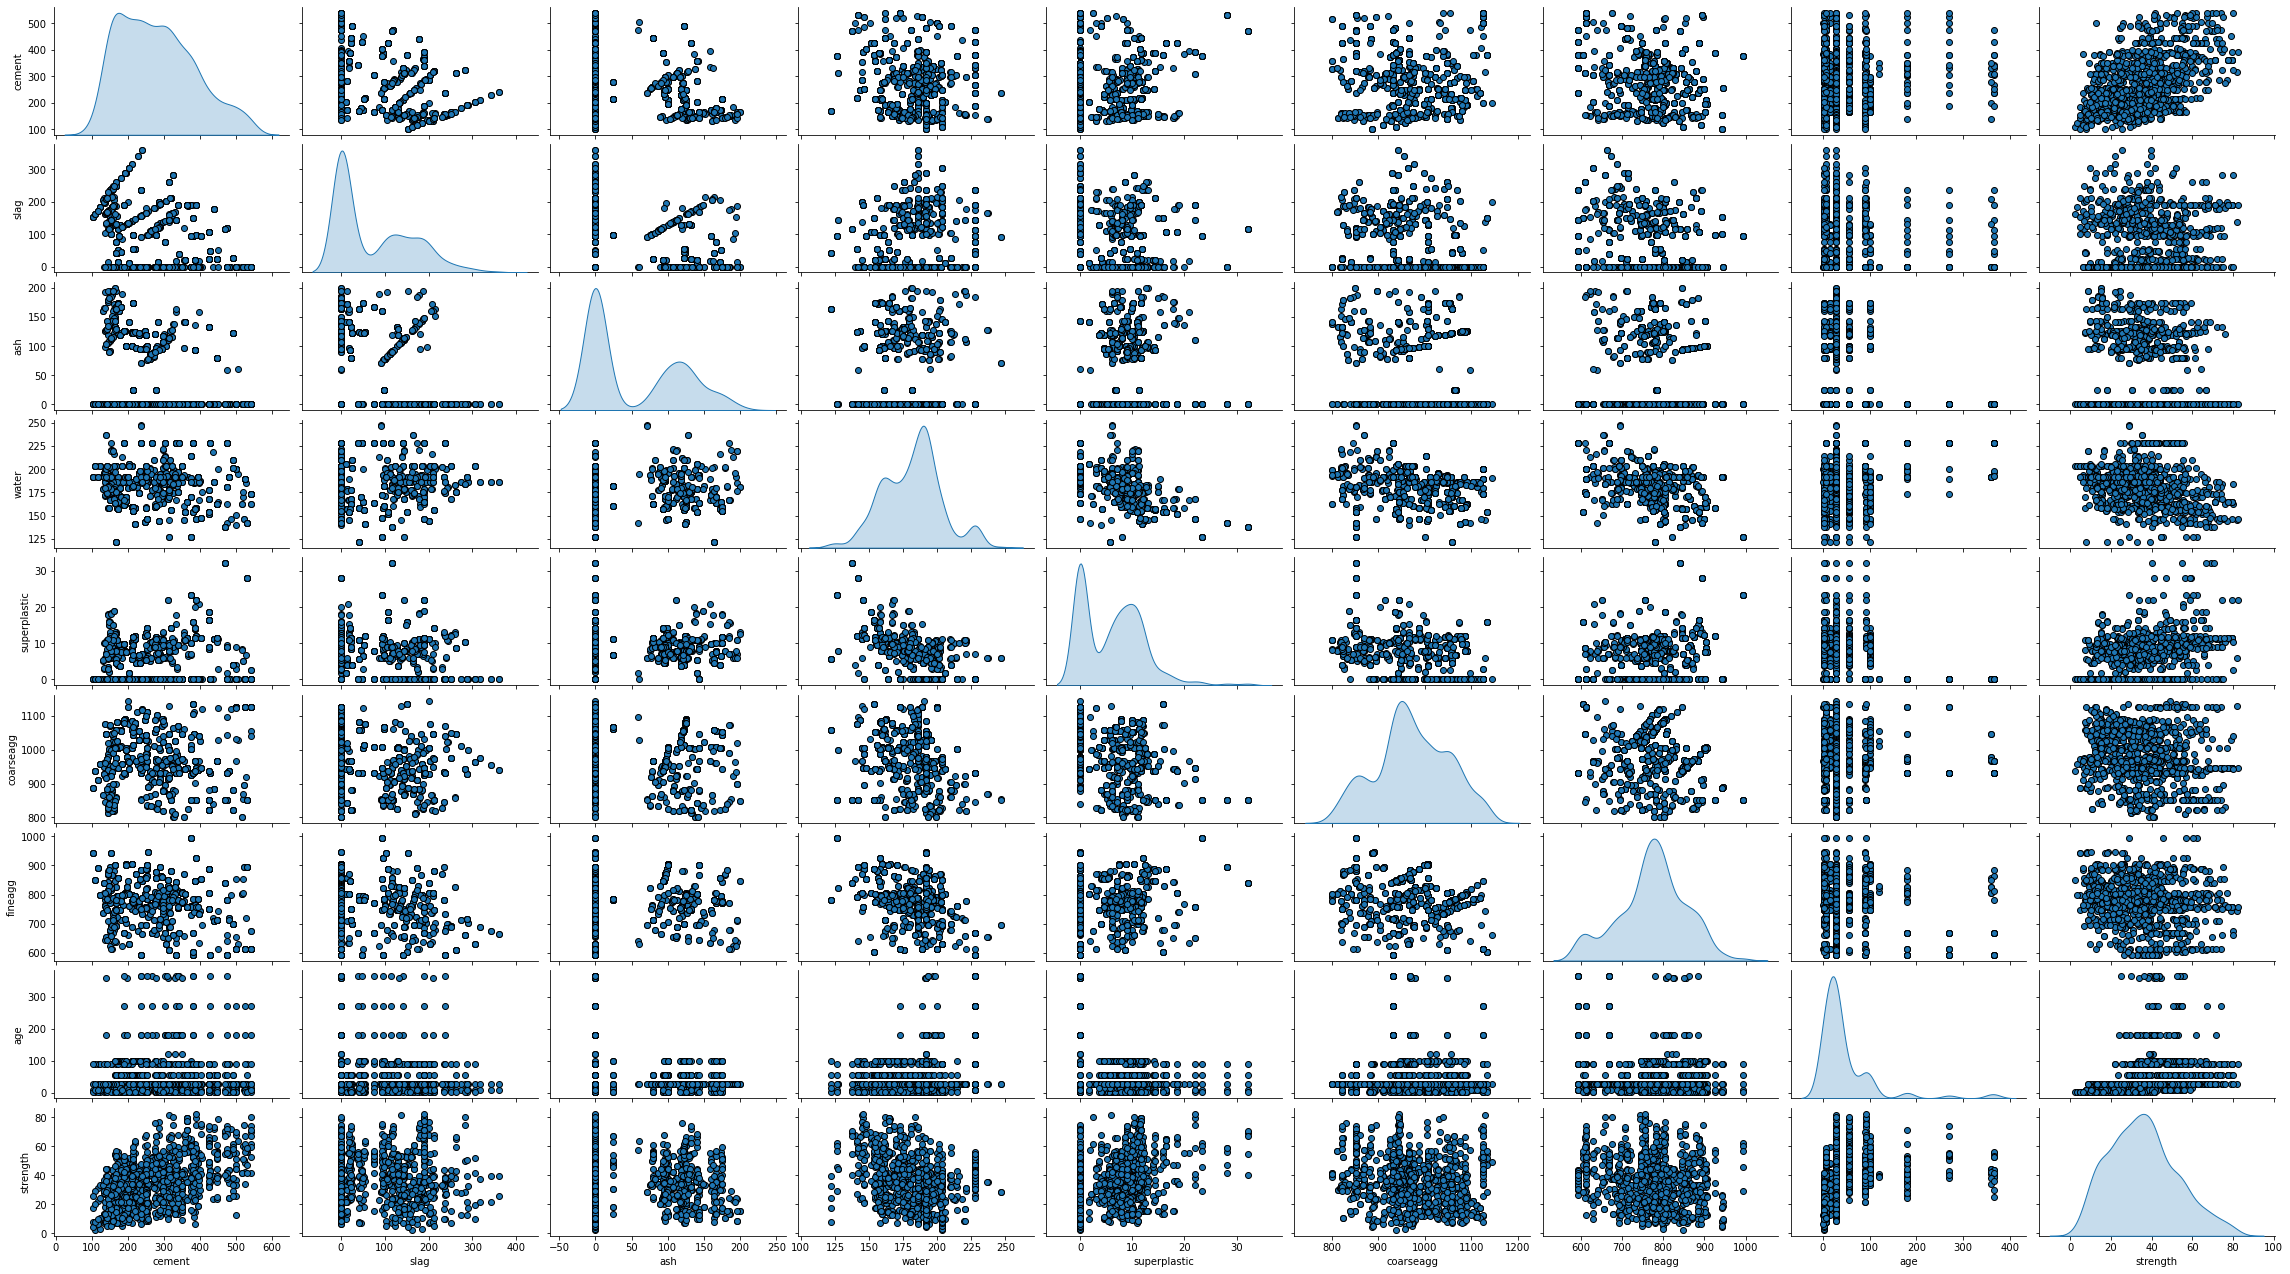

In [12]:
fig=sns.pairplot(data,height=2.0, aspect=1.8, 
                plot_kws={'edgecolor': 'k', 'linewidth': 1.0},
                diag_kind='kde', diag_kws={'shade': True})

C:\Users\sudar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sudar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sudar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

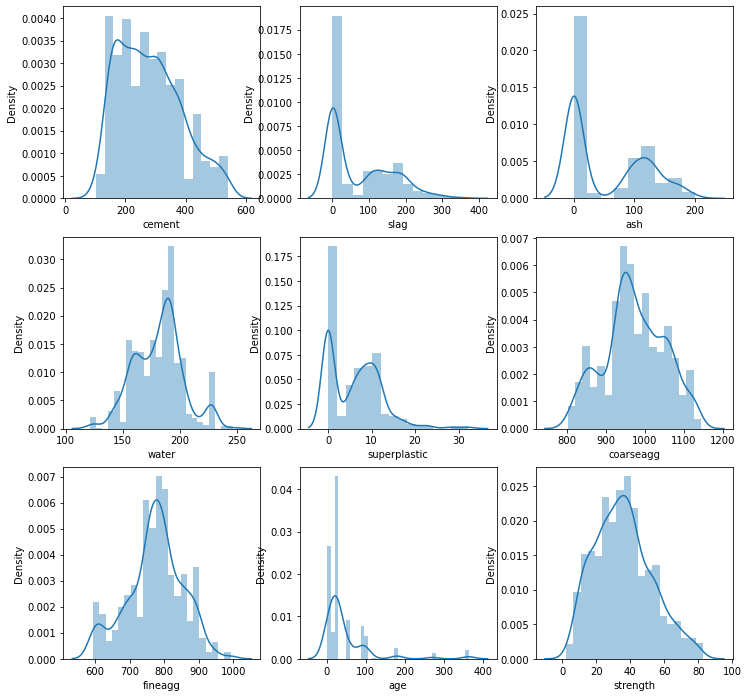

In [13]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in data.columns:
    plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [15]:
x = data.drop('strength', axis=1)

In [16]:
x

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28
...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270


In [17]:
y = data['strength']

In [18]:
y

0       29.89
1       23.51
2       29.22
3       45.85
4       18.29
        ...  
1025    13.29
1026    41.30
1027    44.28
1028    55.06
1029    52.61
Name: strength, Length: 1030, dtype: float64

In [19]:
for column in x.columns:
    x[column]+=1
    x[column]= np.log(x[column])

In [20]:
x

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,4.957938,5.361292,0.000000,5.320568,0.000000,6.880179,6.619406,3.367296
1,5.135210,3.765840,4.830711,5.070789,2.468100,6.986382,6.681106,2.708050
2,5.525453,0.000000,4.571613,5.238567,1.871802,6.864743,6.759487,3.367296
3,5.587249,4.744932,0.000000,5.433722,0.000000,6.838405,6.508769,3.367296
4,5.048573,5.217107,0.000000,5.269403,2.312535,6.955020,6.547789,3.367296
...,...,...,...,...,...,...,...,...
1025,4.912655,0.000000,5.117994,5.198497,2.397895,6.869014,6.692084,3.367296
1026,6.277207,0.000000,0.000000,4.961445,3.374169,6.748877,6.796488,1.386294
1027,5.625461,4.762174,4.514151,5.196285,2.292535,6.769757,6.645481,3.367296
1028,5.837730,3.663562,0.000000,5.433722,0.000000,6.838405,6.508769,5.602119


C:\Users\sudar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sudar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sudar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

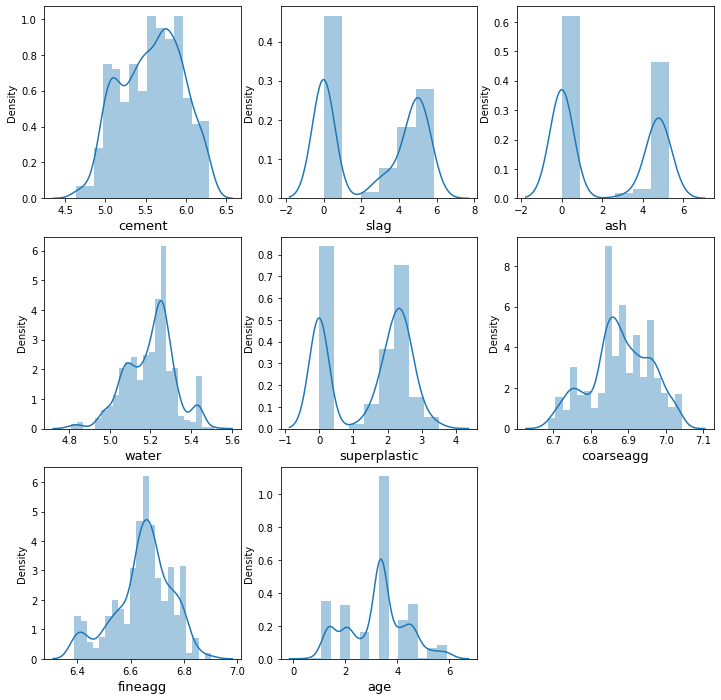

In [21]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber = 1
for column in x.columns:
    plt.subplot(3,3,plotnumber)
    sns.distplot(x[column])
    plt.xlabel(column, fontsize=13)
    plotnumber+=1
plt.show()

C:\Users\sudar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudar\anaconda3\lib\si

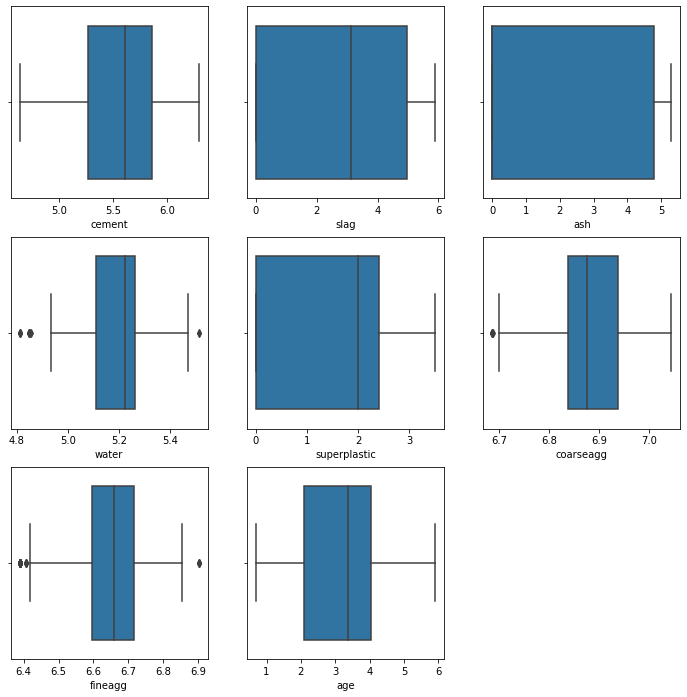

In [22]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in x.columns:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(x[column])
    plt.xlabel(column)
    plotnumber+=1
plt.show()

C:\Users\sudar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudar\anacond

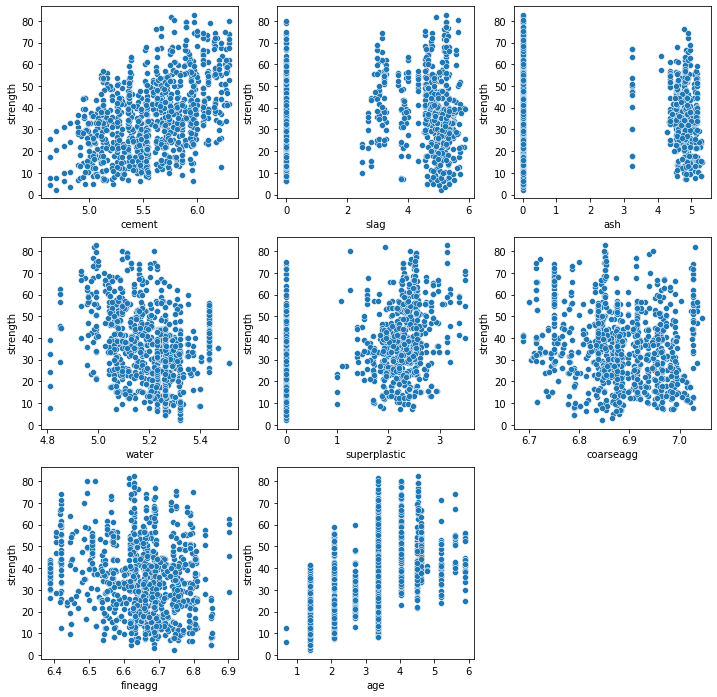

In [23]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in x.columns:
    plt.subplot(3,3,plotnumber)
    sns.scatterplot(x[column],y)
    plt.xlabel(column)
    plotnumber+=1
plt.show()

<AxesSubplot:>

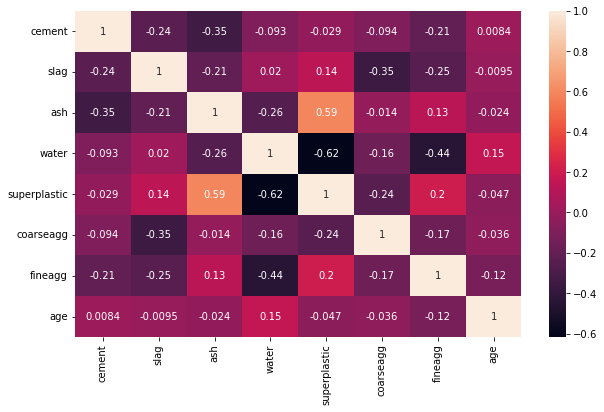

In [24]:
plt.figure(figsize=(10,6),facecolor='white')
sns.heatmap(x.corr(), annot=True)

In [25]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [26]:
x_train

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
196,5.450180,0.000000,4.808927,5.164786,2.041220,6.963568,6.658653,2.708050
631,6.102559,3.218876,4.382027,5.093750,2.533697,6.875232,6.569481,1.386294
81,4.762174,5.159055,0.000000,5.262690,0.000000,6.814323,6.794475,4.510860
526,6.216606,0.000000,0.000000,5.303305,0.000000,7.026427,6.419995,1.386294
830,6.054439,4.675629,0.000000,5.040194,2.862201,6.748877,6.789084,2.079442
...,...,...,...,...,...,...,...,...
87,5.363637,0.000000,4.619073,5.077047,2.272126,6.916517,6.807493,2.708050
330,5.126342,4.874434,4.864453,5.173321,2.174752,6.915029,6.616868,2.708050
466,6.086775,5.181784,0.000000,5.231109,2.493205,6.786604,6.563714,1.386294
121,5.525453,0.000000,4.571613,5.261653,1.840550,6.856357,6.754837,4.043051


In [27]:
x_test

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
31,6.165418,0.000000,0.000000,5.433722,0.000000,6.838405,6.388561,3.367296
109,5.791488,0.000000,4.933754,5.298317,2.468100,6.687233,6.676454,3.367296
136,5.122773,5.526249,0.000000,5.320568,0.000000,6.884077,6.541895,4.510860
88,5.896054,5.247024,0.000000,5.111385,2.533697,6.851925,6.629099,1.386294
918,5.483136,5.887215,0.000000,5.229503,0.000000,6.848642,6.500238,3.367296
...,...,...,...,...,...,...,...,...
250,5.369707,4.596129,3.238678,5.207845,2.041220,6.972606,6.667593,3.367296
377,5.669881,0.000000,0.000000,5.262690,0.000000,6.818049,6.798275,4.510860
615,6.198479,3.295837,4.820282,5.351858,1.589235,6.783325,6.551080,4.043051
9,5.049856,5.220356,4.969813,5.273000,2.302585,6.781058,6.551080,3.367296


In [28]:
y_train

196    26.77
631    35.36
81     31.02
526    26.06
830    49.20
       ...  
87     26.31
330    31.81
466    39.30
121    39.64
860    33.76
Name: strength, Length: 721, dtype: float64

In [29]:
y_test

31     39.29
109    38.63
136    43.57
88     35.30
918    39.44
       ...  
250    40.23
377    32.07
615    59.59
9      28.99
357     8.06
Name: strength, Length: 309, dtype: float64

In [30]:
scalar = StandardScaler()

In [31]:
X_train = scalar.fit(x_train)

In [32]:
X_train = scalar.transform(x_train)

In [33]:
X_test = scalar.transform(x_test)

In [34]:
X_train= pd.DataFrame(X_train,columns=x_train.columns)

In [35]:
X_train

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-0.290893,-1.080253,1.150396,-0.320218,0.509371,1.058956,0.137111,-0.498025
1,1.391927,0.247290,0.970077,-0.925628,0.935123,-0.045370,-0.696809,-1.699658
2,-2.065614,1.047468,-0.880850,0.514180,-1.255292,-0.806814,1.407302,1.140942
3,1.686115,-1.080253,-0.880850,0.860323,-1.255292,1.844773,-2.094790,-1.699658
4,1.267803,0.848091,-0.880850,-1.382065,1.219120,-1.624986,1.356893,-1.069505
...,...,...,...,...,...,...,...,...
716,-0.514132,-1.080253,1.070203,-1.067982,0.708992,0.470746,1.529047,-0.498025
717,-1.126237,0.930083,1.173849,-0.247479,0.624810,0.452144,-0.253654,-0.498025
718,1.351213,1.056841,-0.880850,0.245023,0.900118,-1.153343,-0.750741,-1.699658
719,-0.096725,-1.080253,1.050157,0.505344,0.335888,-0.281338,1.036617,0.715649


In [36]:
X_test= pd.DataFrame(X_test,columns=x_test.columns)

In [37]:
X_test

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,1.554074,-1.080253,-0.880850,1.971815,-1.255292,-0.505757,-2.388752,0.101307
1,0.589516,-1.080253,1.203122,0.817816,0.878414,-2.395615,0.303582,0.101307
2,-1.135444,1.198908,-0.880850,1.007449,-1.255292,0.065206,-0.954790,1.140942
3,0.859247,1.083748,-0.880850,-0.775332,0.935123,-0.336736,-0.139272,-1.699658
4,-0.205883,1.347778,-0.880850,0.231339,-1.255292,-0.377783,-1.344365,0.101307
...,...,...,...,...,...,...,...,...
304,-0.498473,0.815303,0.487137,0.046760,0.509371,1.171942,0.220717,0.101307
305,0.275829,-1.080253,-0.880850,0.514180,-1.255292,-0.760233,1.442845,1.140942
306,1.639355,0.279031,1.155192,1.274122,0.118623,-1.194333,-0.868894,0.715649
307,-1.323534,1.072750,1.218353,0.602042,0.735324,-1.222681,-0.868894,0.101307


In [38]:
print(X_train.mean())

cement          2.833301e-16
slag            1.274986e-16
ash            -4.958278e-17
water           5.796969e-15
superplastic   -3.295253e-17
coarseagg       2.283887e-15
fineagg        -4.535823e-15
age            -1.283262e-16
dtype: float64


In [39]:
print(X_train.var())

cement          1.001389
slag            1.001389
ash             1.001389
water           1.001389
superplastic    1.001389
coarseagg       1.001389
fineagg         1.001389
age             1.001389
dtype: float64


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor

In [41]:
models = {
    "                     Linear Regression" : LinearRegression(),
    "                 L2 (Ridge) Regression" : Ridge(),
    "Support Vector Machine (Linear Kernel)" : LinearSVR(),
    "   Support Vector Machine (RBF Kernel)" : SVR(),
    "                         Decision Tree" : DecisionTreeRegressor(),
    "                        Neural Network" : MLPRegressor(),
    "                         Random Forest" : RandomForestRegressor(),
    "                     Gradient Boosting" : GradientBoostingRegressor(),
    "                              AdaBoost" : AdaBoostRegressor()
}

In [42]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print('model trained with. {}'.format(name))

model trained with.                      Linear Regression
model trained with.                  L2 (Ridge) Regression
model trained with. Support Vector Machine (Linear Kernel)
model trained with.    Support Vector Machine (RBF Kernel)
model trained with.                          Decision Tree


C:\Users\sudar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


model trained with.                         Neural Network
model trained with.                          Random Forest
model trained with.                      Gradient Boosting
model trained with.                               AdaBoost


In [43]:
from sklearn.metrics import r2_score

In [44]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    score = r2_score(y_test,y_pred)
    print(score)

0.7738120718809949
0.7738891974151867
0.7789255706647117
0.7965914226863153
0.877438999714368
0.7103991042284968
0.9032613690604645
0.8772389602400786
0.7900241638914413


In [45]:
best_model = GradientBoostingRegressor()
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = r2_score(y_test,y_pred)
print ('score before hyperparameter tuning {}'.format(score))

score before hyperparameter tuning 0.8763117878985573


In [46]:
param = {
    'learning_rate' : [0.01, 0.1, 1.0],
    'n_estimators' : [100, 150, 200],
    'max_depth' : [3, 4, 5]
}

In [47]:
clf = GridSearchCV(estimator=best_model,param_grid=param)
clf.fit(X_train,y_train)
#best_accuracy = clf.best_score_
best_param = clf.best_params_

In [48]:
#print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print(best_param)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [49]:
y_pred = clf.predict(X_test)
score = r2_score(y_test,y_pred)
print ('score after hyperparameter tuning {}'.format(score))

score after hyperparameter tuning 0.8946297886140733
